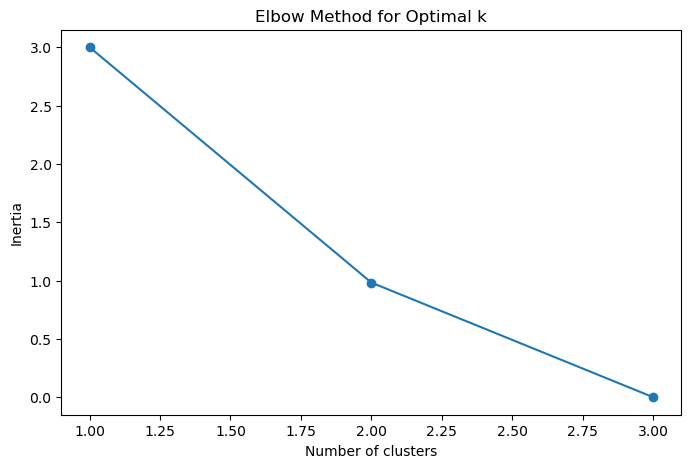

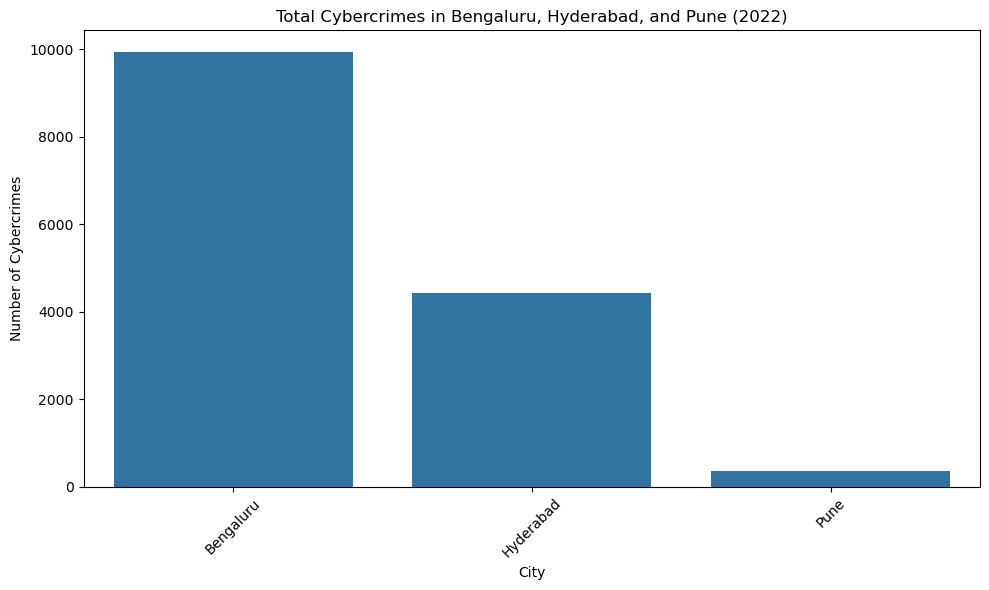

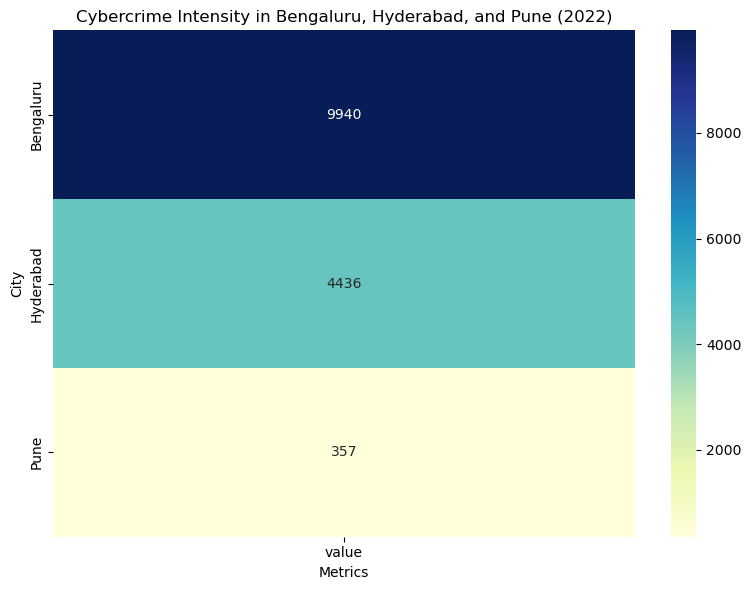


Cluster Characteristics:
         count    mean          std     min     25%     50%     75%     max
Cluster                                                                    
0          2.0  7188.0  3891.915724  4436.0  5812.0  7188.0  8564.0  9940.0
1          1.0   357.0          NaN   357.0   357.0   357.0   357.0   357.0


In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Fix KMeans memory leak issue
os.environ['MKL_THREADING_LAYER'] = 'GNU'  # Use non-MKL threading layer

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the provided file path
file_path = r"C:\Users\91944\Desktop\Research\Crime\All datasets\cyber-crimes-from-ncrb-master-data-year-state-and-city-wise-total-number-of-cyber-crimes-committed-in-india.csv"
data = pd.read_csv(file_path)

# Data Preprocessing
# Filter data for Bengaluru, Hyderabad, and Pune in 2022
selected_cities = ['Bengaluru', 'Hyderabad', 'Pune']
filtered_data = data[(data['city'].isin(selected_cities)) & (data['year'] == 2022)].copy()

# Drop rows with missing values
filtered_data = filtered_data.dropna(subset=['city', 'value'])

# Prepare data for K-Means clustering
X = filtered_data[['value']].values.astype(float)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
range_values = range(1, min(4, len(filtered_data)+1))  # Limit to max 3 clusters if fewer data points

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=1)  # Set n_init=1
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(range_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()  # Show instead of saving

# Choose the optimal number of clusters (k) based on the elbow method plot
n_clusters = 2  # Adjust this value based on the elbow method plot

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=1)  # Set n_init=1
filtered_data.loc[:, 'Cluster'] = kmeans.fit_predict(X_scaled)

# Visualization 1: Bar chart comparing total cybercrime across cities
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='value', data=filtered_data)
plt.title("Total Cybercrimes in Bengaluru, Hyderabad, and Pune (2022)")
plt.xlabel("City")
plt.ylabel("Number of Cybercrimes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  # Show instead of saving

# Visualization 2: Heatmap of crime intensity (single value for each city)
heatmap_data = filtered_data.pivot_table(values='value', index='city', aggfunc='sum')
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Cybercrime Intensity in Bengaluru, Hyderabad, and Pune (2022)")
plt.xlabel("Metrics")
plt.ylabel("City")
plt.tight_layout()
plt.show()  # Show instead of saving

# Print cluster characteristics
print("\nCluster Characteristics:")
print(filtered_data.groupby('Cluster')['value'].describe())

In [5]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Fix KMeans memory leak issue
os.environ["OMP_NUM_THREADS"] = "1"
os.environ['MKL_THREADING_LAYER'] = 'GNU'

# Load the dataset from the provided file path
file_path = r"C:\Users\91944\Desktop\Research\Crime\All datasets\cyber-crimes-from-ncrb-master-data-year-state-and-city-wise-total-number-of-cyber-crimes-committed-in-india.csv"
data = pd.read_csv(file_path)

# Data Preprocessing
selected_cities = ['Bengaluru', 'Hyderabad', 'Pune']
filtered_data = data[(data['city'].isin(selected_cities)) & (data['year'] == 2022)].copy()
filtered_data = filtered_data.dropna(subset=['city', 'value'])

# Prepare data for K-Means clustering
X = filtered_data[['value']].values.astype(float)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
range_values = range(1, min(4, len(filtered_data)+1))

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=1)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Save the elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(range_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig("elbow_method.png", dpi=300)
plt.close()
print("Elbow method graph saved as 'elbow_method.png'.")

# Choose optimal number of clusters
n_clusters = 2  # Adjust this value based on the elbow method plot
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=1)
filtered_data.loc[:, 'Cluster'] = kmeans.fit_predict(X_scaled)

# Save bar chart comparing total cybercrime across cities
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='value', data=filtered_data)
plt.title("Total Cybercrimes in Bengaluru, Hyderabad, and Pune (2022)")
plt.xlabel("City")
plt.ylabel("Number of Cybercrimes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("bar_chart_total_cybercrimes.png", dpi=300)
plt.close()
print("Bar chart saved as 'bar_chart_total_cybercrimes.png'.")

# Save heatmap of crime intensity
heatmap_data = filtered_data.pivot_table(values='value', index='city', aggfunc='sum')
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Cybercrime Intensity in Bengaluru, Hyderabad, and Pune (2022)")
plt.xlabel("Metrics")
plt.ylabel("City")
plt.tight_layout()
plt.savefig("heatmap_crime_intensity.png", dpi=300)
plt.close()
print("Heatmap saved as 'heatmap_crime_intensity.png'.")

# Print cluster characteristics
print("\nCluster Characteristics:")
print(filtered_data.groupby('Cluster')['value'].describe())

Elbow method graph saved as 'elbow_method.png'.
Bar chart saved as 'bar_chart_total_cybercrimes.png'.
Heatmap saved as 'heatmap_crime_intensity.png'.

Cluster Characteristics:
         count    mean          std     min     25%     50%     75%     max
Cluster                                                                    
0          2.0  7188.0  3891.915724  4436.0  5812.0  7188.0  8564.0  9940.0
1          1.0   357.0          NaN   357.0   357.0   357.0   357.0   357.0
